# Mathematics and Statistics

Given 5 points $(x_0,y_0), (x_1,y_1), (x_2,y_2), (x_3,y_3), (x_4,y_4)$, can you find a polynomial of degree 4 which contains each of these points?

Hint:
Our polynomial will be of the form
$P(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + a_4 x^4 $, 

and for this to pass through all 5 points we need:
$P(x_i) = y_i$ for $i \in \{0,1,2,3,4\}$

This is equivalent to:

$
\begin{pmatrix} 1 & x_0 & x_0^2 & x_0^3 & x_0^4 \\ 1 & x_1 & x_1^2 & x_1^3 & x_1^4 \\ 1 & x_2 & x_2^2 & x_2^3 & x_2^4 \\ 1 & x_3 & x_3^2 & x_3^3 & x_3^4 \\ 1 & x_4 & x_4^2 & x_4^3 & x_4^4 \\ \end{pmatrix} \begin{pmatrix} a_0 \\ a_1 \\ a_2 \\ a_3 \\ a_4 \\ \end{pmatrix} = \begin{pmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \\ y_4 \\  \end{pmatrix} $

We need to find the $a_i$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_a_i(X0, X1, X2, X3, X4):
    A = np.array([[1, X0[0], X0[0]**2, X0[0]**3, X0[0]**4],
                  [1, X1[0], X1[0]**2, X1[0]**3, X1[0]**4], 
                  [1, X2[0], X2[0]**2, X2[0]**3, X2[0]**4], 
                  [1, X3[0], X3[0]**2, X3[0]**3, X3[0]**4], 
                  [1, X4[0], X4[0]**2, X4[0]**3, X4[0]**4]])
    
    B = np.array([X0[1],X1[1],X2[1],X3[1],X4[1]])
    
    coefficients = np.linalg.solve(A,B)
    
    return coefficients[::-1] # Reversed order to have the x^4 coefficient first and so on...

In [2]:
def interpolate(X0, X1, X2, X3, X4):
    
    minx = min(X0[0], X1[0], X2[0], X3[0], X4[0])
    maxx = max(X0[0], X1[0], X2[0], X3[0], X4[0])
    miny = min(X0[1], X1[1], X2[1], X3[1], X4[1])
    maxy = max(X0[1], X1[1], X2[1], X3[1], X4[1])
    
    plt.plot([X0[0], X1[0], X2[0], X3[0], X4[0]],
             [X0[1], X1[1], X2[1], X3[1], X4[1]], 'ro')
    
    x = np.arange(minx, maxx, (maxx-minx)/10000)

    coefficients = solve_a_i(X0, X1, X2, X3, X4)
    plt.plot(x, np.polyval(coefficients,x))
    
    plt.axis([minx-0.1*(maxx-minx), maxx+0.1*(maxx-minx), 
              miny - 0.1*(maxy-miny), maxy + 0.1*(maxy-miny)])
    
    plt.show()

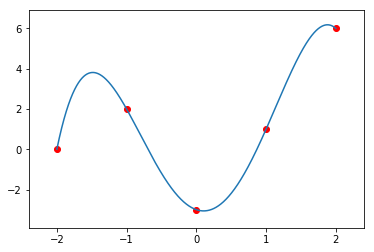

In [3]:
interpolate([-2,0], [-1,2], [0,-3], [1,1], [2,6])

Linear Regression

Given a set of n 2D points $(x_1,y_1), (x_2,y_2), \dots, (x_n,y_n)$, find the line $\hat{y}(x) = b_0 + b_1x$ that minimises the squared distance between the predicted and actual values, $\hat{y}(x_i)$ and $y(x_i)$ repsectively. 

The squared distance is given by $\sum_{i=1}^{n} (\hat{y}(x_i) - y(x_i))^2$

Using basic calculus and algebra we get the following equations for b_0 and b_1:

\begin{align*}
b_0 = \frac{(\sum_{i=1}^{n}y_i)(\sum_{i=1}^{n}x_i^2) - (\sum_{i=1}^{n}x_i)(\sum_{i=1}^{n}x_iy_i)}{n\sum_{i=1}^{n}x_i^2 - (\sum_{i=1}^{n}x_i)^2}
\end{align*}

\begin{align*}
b_1 = \frac{n\sum_{i=1}^{n}x_iy_i - (\sum_{i=1}^{n}x_i)(\sum_{i=1}^{n}y_i)}{n\sum_{i=1}^{n}x_i^2 - (\sum_{i=1}^{n}x_i)^2}
\end{align*}

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression(X,Y):
    n = len(X)
    
    sumx = sum(X)
    sumy = sum(Y)
    sumx2 = sum([point**2 for point in X])
    sumxy = np.dot(X, Y)
    
    b0 = (sumx2*sumy - sumx*sumxy) / (n*sumx2 - sumx**2)
    b1 = (n*sumxy - sumx*sumy) / (n*sumx2 - sumx**2)
    
    plt.plot([X],[Y], 'ro')
    
    maxx = max(X)
    minx = min(X)
    maxy = max(Y)
    miny = min(Y)
    
    x = np.arange(minx, maxx, (maxx-minx)/10000)
    plt.plot(x, np.polyval([b1,b0],x))
    
    plt.axis([minx-0.1*(maxx-minx), maxx+0.1*(maxx-minx), 
              miny - 0.1*(maxy-miny), maxy + 0.1*(maxy-miny)])

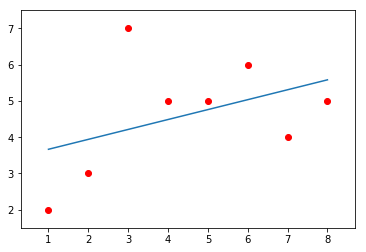

In [5]:
linear_regression([1,2,3,4,5,6,7,8], [2,3,7,5,5,6,4,5])